In [ ]:
"""
Created By    : Jared W. Marquis
Creation Date : 01 August 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #02 - Successive Corrections

Purpose:
Script to take sparse upper air observations and analyze them on a
polar stereographic map projection using successive corrections.
[PUT MORE INFORMATION HERE - I.E., WHAT SPECIFIC THING IS BEING DONE]

"""
__author__    = "Jared W. Marquis"
__contact__   = "jared.marquis@und.edu"

In [1]:
#Used Colab for further works, supports Pip
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 33.0 MB/s eta 0:00:00


In [2]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles

In [ ]:
### Create function for Cressman Analysis ###
def cressman...:
    """
    Function to analyze the value at a given point from other data
    using a Cressman analysis technique.

    inputs:
      something = something

    returns:
      something = something
    """

    return something

In [ ]:
### Create function for bilinear interpolation ###


In [4]:
### Read in observations ###
data_path = '/content/RAOBs_201903131200.txt'
data = np.genfromtxt(data_path, delimiter=',', dtype=str)

# Individual columns for each data
station_ids = data[:, 0]  # Station IDs
station_lat = data[:, 1].astype(float)  # Latitude values
station_lon = data[:, 2].astype(float)  # Longitude values
heights = data[:, 3].astype(float)  # 500-mb Height


In [5]:
phi0 = np.radians(60)  # central latitude φ0 in radians
lambda0 = np.radians(-115)
lat_rad=np.radians (station_lat)
lon_rad=np.radians(station_lon) # central longitude λ0 in radians
R = 6371*1000  # Earth's radius in meters
m = 1 / 15000000  # map scale

proj= ccrs.Stereographic(central_latitude=90, central_longitude=-115,true_scale_latitude=60)

Shape of x_grid: (22,)
Shape of y_grid: (28,)


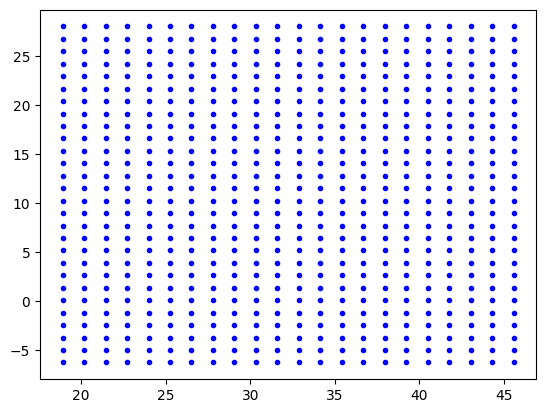

In [6]:
### Set up analysis map with a 22x28 rectangular grid of points ###
x0, y0 = 18.90, -6.30
dx, dy = 1.27, 1.27
nx, ny = 22,28
# Making a (22x28) grid
x_grid = np.linspace(x0, x0 + (nx - 1) * dx, nx)
y_grid = np.linspace(y0, y0 + (ny - 1) * dy, ny)

X, Y = np.meshgrid(x_grid, y_grid)
print("Shape of x_grid:", x_grid.shape)
print("Shape of y_grid:", y_grid.shape)
plt.scatter(X, Y, color='blue', label='Grid Points', marker='.')

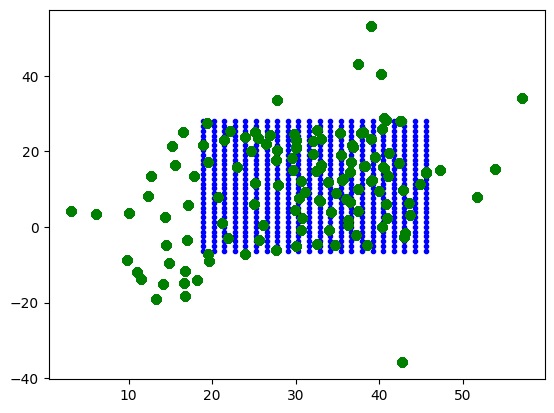

In [7]:
### convert obs lat/long to x,y ###
def latlon_to_xy(station_lat, station_lon):
  sigma = (1+np.sin(phi0)) / (1+np.sin(lat_rad))

  x_obs = R * sigma * m *np.cos(lat_rad)*np.cos(lon_rad-lambda0)*100

  y_obs = R * sigma * m *np.cos(lat_rad)*np.sin(lon_rad-lambda0)*100

  return x_obs, y_obs

# Apply the function to all latitude and longitude values
obs_coords = np.array([latlon_to_xy(lat, lon) for lat, lon in zip(station_lat, station_lon)])

# Separate x and y coordinates
xk, yk = obs_coords[:, 0], obs_coords[:, 1]

#Plot the Stations and the Grid to Verify Alignment (I got wrong here somewhere)
plt.scatter(X, Y, color='blue', label='Grid Points', marker='.')  # Plot the grid points
plt.scatter(xk, yk, color='green', label='Converted Station Positions', marker='o')  # Plot station positions

In [ ]:
### Perform 500mb geopotential height analyses using a Cressman weighting Function###
#Use radii of influence 4, 2.5, 1.5 *dmin


In [ ]:
### First analysis, no successive corrections ###


In [ ]:
### Next Analyses ###

In [ ]:
### Calculate Analysis Differences


In [ ]:
### Plot 500mb analyses over a map ###
#use old code...



In [ ]:
### Plot Analysis Differences ###


In [ ]:
### Store the analyses in text files ###


In [ ]:
### Store the difference fields in text files ###


In [ ]:
### Store RMS values in text file ###


In [ ]:
### In a separte text file (or below), answer the following questions ###
'''
1 - Describe the general features that you see in your contoured analyses.


2 - Describe the differences that you see in your contoured analyses.
    Does one analysis seem to be smoother than the other?  If so, what would cause this?


3 - What happens as you increase the number of successive correction passes?  Is this
    desirable?  Why or why not?


'''